In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

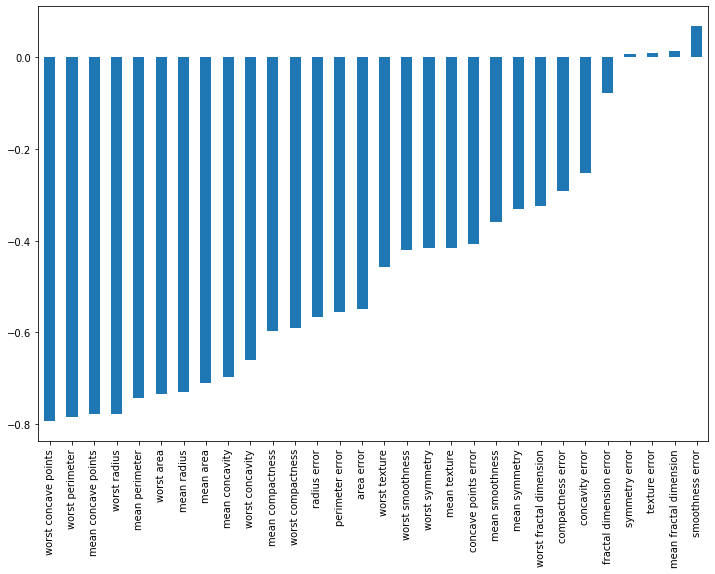

In [4]:
plt.figure(figsize=(12,8))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar');

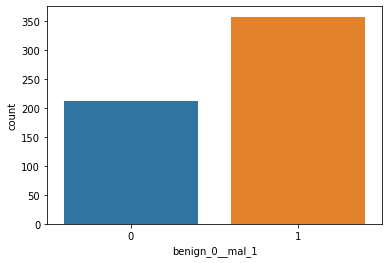

In [5]:
sns.countplot(x='benign_0__mal_1', data=df);

In [6]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=32)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [10]:
X_train.shape

(512, 30)

In [11]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [12]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Train on 512 samples, validate on 57 samples
Epoch 1/600
512/512 [==============================] - 1s 1ms/sample - loss: 0.6787 - val_loss: 0.6724
Epoch 2/600
512/512 [==============================] - 0s 76us/sample - loss: 0.6520 - val_loss: 0.6508
Epoch 3/600
512/512 [==============================] - 0s 78us/sample - loss: 0.6240 - val_loss: 0.6244
Epoch 4/600
512/512 [==============================] - 0s 76us/sample - loss: 0.5874 - val_loss: 0.5896
Epoch 5/600
512/512 [==============================] - 0s 70us/sample - loss: 0.5384 - val_loss: 0.5481
Epoch 6/600
512/512 [==============================] - 0s 70us/sample - loss: 0.4866 - val_loss: 0.5016
Epoch 7/600
512/512 [==============================] - 0s 70us/sample - loss: 0.4346 - val_loss: 0.4535
Epoch 8/600
512/512 [==============================] - 0s 68us/sample - loss: 0.3866 - val_loss: 0.4111
Epoch 9/600
512/512 [==============================] - 0s 74us/sample - loss: 0.3430 - val_loss: 0.3748
Epoch 10/600
512/512

512/512 [==============================] - 0s 68us/sample - loss: 0.0511 - val_loss: 0.1009
Epoch 79/600
512/512 [==============================] - 0s 76us/sample - loss: 0.0501 - val_loss: 0.0935
Epoch 80/600
512/512 [==============================] - 0s 64us/sample - loss: 0.0496 - val_loss: 0.0959
Epoch 81/600
512/512 [==============================] - 0s 64us/sample - loss: 0.0504 - val_loss: 0.1017
Epoch 82/600
512/512 [==============================] - 0s 68us/sample - loss: 0.0504 - val_loss: 0.0939
Epoch 83/600
512/512 [==============================] - 0s 68us/sample - loss: 0.0476 - val_loss: 0.0960
Epoch 84/600
512/512 [==============================] - 0s 68us/sample - loss: 0.0512 - val_loss: 0.0919
Epoch 85/600
512/512 [==============================] - 0s 74us/sample - loss: 0.0474 - val_loss: 0.0978
Epoch 86/600
512/512 [==============================] - 0s 76us/sample - loss: 0.0472 - val_loss: 0.0940
Epoch 87/600
512/512 [==============================] - 0s 72us/samp

512/512 [==============================] - 0s 66us/sample - loss: 0.0376 - val_loss: 0.1002
Epoch 156/600
512/512 [==============================] - 0s 76us/sample - loss: 0.0369 - val_loss: 0.0996
Epoch 157/600
512/512 [==============================] - 0s 95us/sample - loss: 0.0391 - val_loss: 0.1007
Epoch 158/600
512/512 [==============================] - 0s 88us/sample - loss: 0.0376 - val_loss: 0.0961
Epoch 159/600
512/512 [==============================] - 0s 92us/sample - loss: 0.0364 - val_loss: 0.1020
Epoch 160/600
512/512 [==============================] - 0s 97us/sample - loss: 0.0362 - val_loss: 0.1021
Epoch 161/600
512/512 [==============================] - 0s 97us/sample - loss: 0.0361 - val_loss: 0.0992
Epoch 162/600
512/512 [==============================] - 0s 97us/sample - loss: 0.0357 - val_loss: 0.1014
Epoch 163/600
512/512 [==============================] - 0s 92us/sample - loss: 0.0365 - val_loss: 0.1050
Epoch 164/600
512/512 [==============================] - 0s 

512/512 [==============================] - 0s 70us/sample - loss: 0.0331 - val_loss: 0.1109
Epoch 233/600
512/512 [==============================] - 0s 64us/sample - loss: 0.0288 - val_loss: 0.1083
Epoch 234/600
512/512 [==============================] - 0s 66us/sample - loss: 0.0298 - val_loss: 0.1133
Epoch 235/600
512/512 [==============================] - 0s 68us/sample - loss: 0.0323 - val_loss: 0.1079
Epoch 236/600
512/512 [==============================] - 0s 66us/sample - loss: 0.0297 - val_loss: 0.1104
Epoch 237/600
512/512 [==============================] - 0s 70us/sample - loss: 0.0286 - val_loss: 0.1111
Epoch 238/600
512/512 [==============================] - 0s 70us/sample - loss: 0.0285 - val_loss: 0.1084
Epoch 239/600
512/512 [==============================] - 0s 66us/sample - loss: 0.0293 - val_loss: 0.1088
Epoch 240/600
512/512 [==============================] - 0s 68us/sample - loss: 0.0280 - val_loss: 0.1125
Epoch 241/600
512/512 [==============================] - 0s 

512/512 [==============================] - 0s 97us/sample - loss: 0.0232 - val_loss: 0.1213
Epoch 310/600
512/512 [==============================] - 0s 72us/sample - loss: 0.0227 - val_loss: 0.1184
Epoch 311/600
512/512 [==============================] - 0s 74us/sample - loss: 0.0237 - val_loss: 0.1199
Epoch 312/600
512/512 [==============================] - 0s 95us/sample - loss: 0.0250 - val_loss: 0.1193
Epoch 313/600
512/512 [==============================] - 0s 92us/sample - loss: 0.0259 - val_loss: 0.1265
Epoch 314/600
512/512 [==============================] - 0s 90us/sample - loss: 0.0250 - val_loss: 0.1210
Epoch 315/600
512/512 [==============================] - 0s 95us/sample - loss: 0.0219 - val_loss: 0.1197
Epoch 316/600
512/512 [==============================] - 0s 101us/sample - loss: 0.0236 - val_loss: 0.1276
Epoch 317/600
512/512 [==============================] - 0s 72us/sample - loss: 0.0211 - val_loss: 0.1210
Epoch 318/600
512/512 [==============================] - 0s

512/512 [==============================] - 0s 62us/sample - loss: 0.0170 - val_loss: 0.1213
Epoch 387/600
512/512 [==============================] - 0s 72us/sample - loss: 0.0172 - val_loss: 0.1197
Epoch 388/600
512/512 [==============================] - 0s 62us/sample - loss: 0.0183 - val_loss: 0.1206
Epoch 389/600
512/512 [==============================] - 0s 72us/sample - loss: 0.0200 - val_loss: 0.1234
Epoch 390/600
512/512 [==============================] - 0s 68us/sample - loss: 0.0175 - val_loss: 0.1203
Epoch 391/600
512/512 [==============================] - 0s 66us/sample - loss: 0.0174 - val_loss: 0.1198
Epoch 392/600
512/512 [==============================] - 0s 70us/sample - loss: 0.0179 - val_loss: 0.1207
Epoch 393/600
512/512 [==============================] - 0s 68us/sample - loss: 0.0172 - val_loss: 0.1210
Epoch 394/600
512/512 [==============================] - 0s 70us/sample - loss: 0.0197 - val_loss: 0.1217
Epoch 395/600
512/512 [==============================] - 0s 

Epoch 463/600
512/512 [==============================] - 0s 70us/sample - loss: 0.0141 - val_loss: 0.1271
Epoch 464/600
512/512 [==============================] - 0s 72us/sample - loss: 0.0170 - val_loss: 0.1273
Epoch 465/600
512/512 [==============================] - 0s 64us/sample - loss: 0.0142 - val_loss: 0.1206
Epoch 466/600
512/512 [==============================] - 0s 68us/sample - loss: 0.0155 - val_loss: 0.1228
Epoch 467/600
512/512 [==============================] - 0s 88us/sample - loss: 0.0137 - val_loss: 0.1226
Epoch 468/600
512/512 [==============================] - 0s 88us/sample - loss: 0.0136 - val_loss: 0.1233
Epoch 469/600
512/512 [==============================] - ETA: 0s - loss: 0.008 - 0s 90us/sample - loss: 0.0136 - val_loss: 0.1284
Epoch 470/600
512/512 [==============================] - 0s 90us/sample - loss: 0.0135 - val_loss: 0.1257
Epoch 471/600
512/512 [==============================] - 0s 92us/sample - loss: 0.0158 - val_loss: 0.1236
Epoch 472/600
512/512 

Epoch 540/600
512/512 [==============================] - 0s 72us/sample - loss: 0.0151 - val_loss: 0.1298
Epoch 541/600
512/512 [==============================] - 0s 72us/sample - loss: 0.0161 - val_loss: 0.1359
Epoch 542/600
512/512 [==============================] - 0s 74us/sample - loss: 0.0130 - val_loss: 0.1331
Epoch 543/600
512/512 [==============================] - 0s 70us/sample - loss: 0.0103 - val_loss: 0.1369
Epoch 544/600
512/512 [==============================] - 0s 70us/sample - loss: 0.0100 - val_loss: 0.1353
Epoch 545/600
512/512 [==============================] - 0s 72us/sample - loss: 0.0129 - val_loss: 0.1430
Epoch 546/600
512/512 [==============================] - 0s 72us/sample - loss: 0.0145 - val_loss: 0.1362
Epoch 547/600
512/512 [==============================] - 0s 72us/sample - loss: 0.0090 - val_loss: 0.1395
Epoch 548/600
512/512 [==============================] - 0s 90us/sample - loss: 0.0099 - val_loss: 0.1374
Epoch 549/600
512/512 [=======================

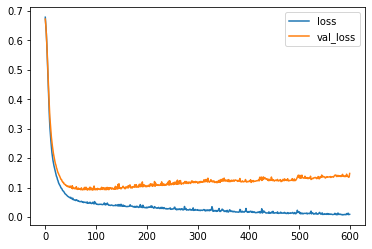

In [13]:
pd.DataFrame(model.history.history).plot();

In [14]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [16]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 512 samples, validate on 57 samples
Epoch 1/600
512/512 [==============================] - 0s 670us/sample - loss: 0.6878 - val_loss: 0.6878
Epoch 2/600
512/512 [==============================] - 0s 68us/sample - loss: 0.6499 - val_loss: 0.6630
Epoch 3/600
512/512 [==============================] - 0s 66us/sample - loss: 0.6169 - val_loss: 0.6350
Epoch 4/600
512/512 [==============================] - 0s 64us/sample - loss: 0.5762 - val_loss: 0.6006
Epoch 5/600
512/512 [==============================] - 0s 70us/sample - loss: 0.5272 - val_loss: 0.5494
Epoch 6/600
512/512 [==============================] - 0s 68us/sample - loss: 0.4663 - val_loss: 0.4920
Epoch 7/600
512/512 [==============================] - 0s 72us/sample - loss: 0.4049 - val_loss: 0.4315
Epoch 8/600
512/512 [==============================] - 0s 68us/sample - loss: 0.3453 - val_loss: 0.3753
Epoch 9/600
512/512 [==============================] - 0s 70us/sample - loss: 0.2980 - val_loss: 0.3297
Epoch 10/600
512/5

512/512 [==============================] - 0s 72us/sample - loss: 0.0464 - val_loss: 0.0880
Epoch 79/600
512/512 [==============================] - 0s 70us/sample - loss: 0.0464 - val_loss: 0.0890
Epoch 80/600
512/512 [==============================] - 0s 62us/sample - loss: 0.0457 - val_loss: 0.0850
Epoch 81/600
512/512 [==============================] - 0s 66us/sample - loss: 0.0462 - val_loss: 0.0883
Epoch 82/600
512/512 [==============================] - 0s 66us/sample - loss: 0.0483 - val_loss: 0.0850
Epoch 83/600
512/512 [==============================] - 0s 68us/sample - loss: 0.0445 - val_loss: 0.0879
Epoch 84/600
512/512 [==============================] - 0s 70us/sample - loss: 0.0447 - val_loss: 0.0874
Epoch 85/600
512/512 [==============================] - 0s 70us/sample - loss: 0.0444 - val_loss: 0.0854
Epoch 86/600
512/512 [==============================] - 0s 66us/sample - loss: 0.0439 - val_loss: 0.0871
Epoch 87/600
512/512 [==============================] - 0s 66us/samp

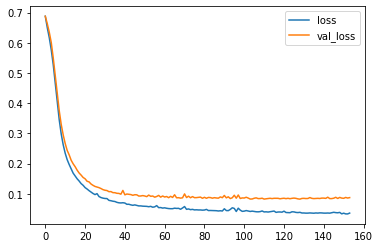

In [17]:
pd.DataFrame(model.history.history).plot();

In [18]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [19]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 512 samples, validate on 57 samples
Epoch 1/600
512/512 [==============================] - 0s 898us/sample - loss: 0.7083 - val_loss: 0.6514
Epoch 2/600
512/512 [==============================] - 0s 70us/sample - loss: 0.6663 - val_loss: 0.6385
Epoch 3/600
512/512 [==============================] - 0s 74us/sample - loss: 0.6446 - val_loss: 0.6237
Epoch 4/600
512/512 [==============================] - 0s 74us/sample - loss: 0.6169 - val_loss: 0.6069
Epoch 5/600
512/512 [==============================] - 0s 74us/sample - loss: 0.6040 - val_loss: 0.5880
Epoch 6/600
512/512 [==============================] - 0s 74us/sample - loss: 0.5968 - val_loss: 0.5679
Epoch 7/600
512/512 [==============================] - 0s 88us/sample - loss: 0.5713 - val_loss: 0.5460
Epoch 8/600
512/512 [==============================] - 0s 72us/sample - loss: 0.5510 - val_loss: 0.5260
Epoch 9/600
512/512 [==============================] - 0s 74us/sample - loss: 0.5201 - val_loss: 0.5022
Epoch 10/600
512/5

512/512 [==============================] - 0s 74us/sample - loss: 0.1644 - val_loss: 0.1051
Epoch 79/600
512/512 [==============================] - 0s 72us/sample - loss: 0.1315 - val_loss: 0.1100
Epoch 80/600
512/512 [==============================] - 0s 72us/sample - loss: 0.1292 - val_loss: 0.1094
Epoch 81/600
512/512 [==============================] - 0s 74us/sample - loss: 0.1506 - val_loss: 0.1073
Epoch 82/600
512/512 [==============================] - 0s 68us/sample - loss: 0.1276 - val_loss: 0.1068
Epoch 83/600
512/512 [==============================] - 0s 72us/sample - loss: 0.1303 - val_loss: 0.1048
Epoch 84/600
512/512 [==============================] - 0s 70us/sample - loss: 0.1523 - val_loss: 0.1089
Epoch 85/600
512/512 [==============================] - 0s 68us/sample - loss: 0.1354 - val_loss: 0.1070
Epoch 86/600
512/512 [==============================] - 0s 70us/sample - loss: 0.1561 - val_loss: 0.1102
Epoch 87/600
512/512 [==============================] - 0s 74us/samp

512/512 [==============================] - 0s 68us/sample - loss: 0.0826 - val_loss: 0.0932
Epoch 156/600
512/512 [==============================] - 0s 64us/sample - loss: 0.0747 - val_loss: 0.0897
Epoch 157/600
512/512 [==============================] - 0s 66us/sample - loss: 0.0899 - val_loss: 0.1003
Epoch 158/600
512/512 [==============================] - 0s 68us/sample - loss: 0.0779 - val_loss: 0.0919
Epoch 159/600
512/512 [==============================] - 0s 64us/sample - loss: 0.0975 - val_loss: 0.0906
Epoch 160/600
512/512 [==============================] - 0s 64us/sample - loss: 0.0939 - val_loss: 0.1067
Epoch 161/600
512/512 [==============================] - 0s 66us/sample - loss: 0.0963 - val_loss: 0.0931
Epoch 162/600
512/512 [==============================] - 0s 68us/sample - loss: 0.0871 - val_loss: 0.0850
Epoch 163/600
512/512 [==============================] - 0s 64us/sample - loss: 0.0850 - val_loss: 0.0944
Epoch 164/600
512/512 [==============================] - 0s 

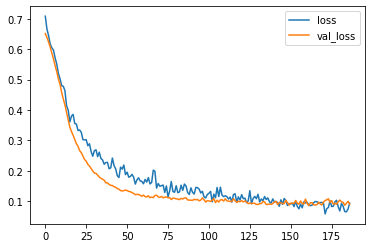

In [20]:
pd.DataFrame(model.history.history).plot();

In [21]:
predictions = model.predict_classes(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.97      0.97      0.97        34

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



In [24]:
print(confusion_matrix(y_test,predictions))

[[22  1]
 [ 1 33]]
